In [ ]:
# Import necessary libraries
import pandas as pd
import random
import os
import statistics as st
import math

In [ ]:
%config IPCompleter.greedy=True


In [ ]:
current_folder = os.getcwd()
print(current_folder)

/work


In [ ]:
# Retrieve the names of the 22 files and assign them to a List variable
# You would need to filter out other files
# Display the names of these 22 files
file_list = os.listdir('./data/input')
file_list

['MERGED2005_06_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2009_10_PP.csv',
 'Crosswalks.zip',
 'Most-Recent-Cohorts-All-Data-Elements.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2013_14_PP.csv',
 'Most-Recent-Cohorts-Field-of-Study.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2002_03_PP.csv',
 'data.yaml',
 'MERGED1997_98_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2018_19_PP.csv',
 'FieldOfStudyData1617_1718_PP.csv',
 'MERGED2011_12_PP.csv',
 'FieldOfStudyData1415_1516_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2004_05_PP.csv']

In [ ]:
# Write code to randomly select one file name out of the 22 files names. 
# Hint: generate a random integer between 0 and 21 first
# Display the file name
df = pd.read_csv("./data/input/MERGED2009_10_PP.csv")
df.shape


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (1,1351,1365,1377,1378,1407,1408,1411,1426,1431,1432,1433,1445,1446,1447,1461,1489,1537,1538,1539,1540,1541,1542,1547,1548,1549,1553,1554,1559,1560,1561,1562,1563,1567,1568,1571,1572,1573,1574,1606,1609,1610,1611,1613,1614,1615,1616,1636,1637,1711,1723,1724,1729,1909,1910,1911,1912,1913) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(7217, 2383)

In [ ]:
# Only read the two columns: college name (INSTNM) and in state tution ("TUITIONFEE_IN")
# from this file into a data frame aand display use info() function to display a summary information
df = pd.read_csv("./data/input/MERGED2009_10_PP.csv",usecols=['INSTNM','TUITIONFEE_IN'])
df.head()


,INSTNM,TUITIONFEE_IN
0,Community College of the Air Force,NaN
1,Alabama A & M University,4692.0
2,University of Alabama at Birmingham,5096.0
3,Amridge University,8000.0
4,University of Alabama in Huntsville,6510.0


In [ ]:
# Find out how many observations have missing value.
df.isnull().sum()

INSTNM              0
TUITIONFEE_IN    2928
dtype: int64

In [ ]:
# Drop those observations with missing value
# Disaply the number of observations afterward
df = df.dropna() 
df.shape


(4289, 2)

In [ ]:
# Find out how many observations have 0 tution.
zero_tuition = df[df['TUITIONFEE_IN']==0]
zero_tuition.shape


(5, 2)

In [ ]:
# 8 - Drop those observations with 0 tuition
# Disaply the number of observations afterward
df = df[df['TUITIONFEE_IN']!=0]
df.shape

(4284, 2)

In [ ]:
# Calculate and display the mean (average) of the tuitions of all the remaining observations
average_fee = st.mean(df['TUITIONFEE_IN'])
print('Average Tuition Fees ', average_fee )


Average Tuition Fees  12067.689775910365


In [ ]:
# 10 - Randomly select just 1 observation from the data frame.
# Display the tuition of that observation.
row = df.sample() 
row


,INSTNM,TUITIONFEE_IN
6416,National American University-Zona Rosa,12160.0


In [ ]:
# Calculate the different between the tuition of this observation and 
# the mean tuition off all observations calculated earlier.
# Display the difference
print(row['TUITIONFEE_IN']-average_fee)


2833   -5977.689776
Name: TUITIONFEE_IN, dtype: float64


In [ ]:
# Randomly select 20 observations, display the tuition of these observation.
random_observations = df.sample(20)
random_observations


,INSTNM,TUITIONFEE_IN
815,Cortiva Institute-Florida,11765.0
4096,Vernon College,2490.0
2084,Crossroads College,14290.0
3250,Urbana University,20130.0
2695,Marion S Whelan School of Nursing of Geneva Ge...,8645.0
6071,Colorado Technical University-Online,11660.0
2968,Piedmont Community College,1549.0
3348,ITT Technical Institute-Portland,17148.0
2613,CUNY Bernard M Baruch College,4970.0
605,Bel-Rea Institute of Animal Technology,9094.0


In [ ]:
# Calculate and display the mean tuition of these 20 observations
mean_random_obs = st.mean(random_observations['TUITIONFEE_IN'])
print('Average Tuition fee of Random Observations :', mean_random_obs)


Average Tuition fee of Random Observations : 10026.9


In [ ]:
# Calculate  the different between the average tuition of these 20 observations 
# and the mean tuition off all observations calculated earlier.
# Display the difference
mean_diff = mean_random_obs-average_fee
print('Difference between Random observations and previous observations ',mean_diff)


Difference between Random observations and previous observations  -2040.7897759103653


Write a function that take two input parameters:

x (number of observations)
y (the name of the dataframe).
The function will perform the following:

Randomly select x observations from y
Calculate the mean of these x observations
Calculate the mean of all observations
Calculate the difference between the two means
Return the difference


In [ ]:
# write function Code here
def mean_difference(x,y):
    random_obs = y.sample(x)
    mean_random_obs = st.mean(random_obs['TUITIONFEE_IN'])
    total_mean = st.mean(y['TUITIONFEE_IN'])
    return abs(mean_random_obs-total_mean)


In [ ]:
# test the function by passing a sample size and the name of the dataframe
# Dsplay the return of the function
random_sample = 30
print('Mean of random sample: ',mean_difference(30,df))


Mean of random sample:  1355.5897759103646


In [ ]:
# Create a list of sequence numbers from 1 to 50, name it "sample_sizes";
# display it to make sure its members are from 1 to 50
sample_sizes = [i for i in range(1,51)]
print(sample_sizes)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [ ]:
# Create an empty list and name it "means_diff" for differences of population mean and sample means;
# Loop through the list sample_sizes:
# For each element in the sample size list, obtain a random sample of that size from the data frame;
# Calculate the sample mean 
# Calculate the difference between the population mean and the sample mean
# Append the difference to the list "means_diff"
# Display the list "means_diff" after the loop is completed

def calculateMeanDifference(sample_sizes,df):
    means_diff = []
    population_mean = st.mean(df['TUITIONFEE_IN'])
    for i in sample_sizes:
        sample_df = df.sample(i)
        sample_mean = st.mean(sample_df['TUITIONFEE_IN'])
        means_diff.append(abs(sample_mean-population_mean))
    return means_diff
    
print('Means_diff List after the loop :')
means_diff = calculateMeanDifference(sample_sizes,df)
print(means_diff)


Means_diff List after the loop :
[8721.689775910365, 2884.310224089635, 6633.310224089635, 950.3102240896351, 3664.1102240896344, 4168.643557422969, 537.3102240896351, 2845.189775910365, 929.9768907563011, 3184.2102240896347, 4271.871594092183, 3264.976890756301, 4942.925608705018, 4369.90406162465, 1225.0897759103646, 1136.685224089635, 1701.2514005602225, 1556.3008870214762, 3334.889171458057, 1032.6602240896354, 1362.5483193277305, 2630.871594092183, 80.87544148093912, 1950.310224089635, 261.4897759103642, 2418.728237448826, 630.3472611266716, 438.84593837534885, 3485.4483966000207, 135.97689075630115, 194.23816300713952, 1.877275910364915, 2009.0231092436989, 468.2191876750712, 18.28977591036528, 2943.2546685340803, 1978.5264403058518, 530.5318811735233, 95.8692630898513, 2061.314775910365, 1752.3727027396326, 1686.5945378151264, 1823.99210149176, 1870.9625031830928, 635.4435574229683, 371.34194982340887, 670.3280737827045, 1140.127275910365, 447.35104041616614, 825.3897759103656]


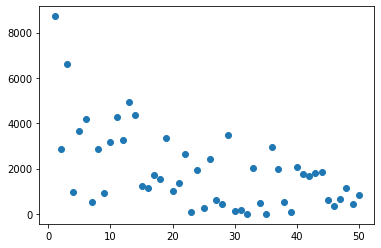

In [ ]:
# Make a scatter plot with sample size on the x-axs and  mean difference on the y-axis
# Observe as the sample size increases, the sample means converge to the population mean.
# Make sure you make the plot large enough
import matplotlib.pyplot as plt
plt.scatter(sample_sizes,means_diff)


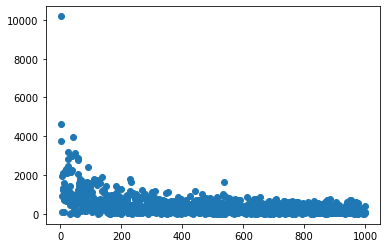

In [ ]:
# repeat 18 to 21 by replacing 50 with a larger number. For example, 300, or even 1000.
# and see how the plot looks.
sample_sizes = [i for i in range(1,1001)]
means_diff = calculateMeanDifference(sample_sizes,df)
plt.scatter(sample_sizes,means_diff)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0dc25f63-ad2b-4b6d-b2fb-3d1873eb10a4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>